In [1]:
!pip install basedosdados

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.2/135.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import basedosdados as bd

1 - Quantos chamados foram abertos no dia 01/04/2023?

In [3]:
df = bd.read_sql(
    """
    SELECT COUNT(*) as total_chamados
    FROM `datario.adm_central_atendimento_1746.chamado`
    WHERE DATE(data_inicio) = '2023-04-01'
    """,
    billing_project_id="ds-datario")
df

Downloading: 100%|██████████| 1/1 [00:00<00:00,  3.19rows/s]


,total_chamados
0,1756


In [4]:
print(f"Foram abertos {df['total_chamados'].iloc[0]} chamados no dia 01/04/2023")

Foram abertos 1756 chamados no dia 01/04/2023


2 - Qual o tipo de chamado que teve mais teve chamados abertos no dia 01/04/2023?

In [5]:
df2 = bd.read_sql(
"""
SELECT tipo,
COUNT(id_chamado) AS quantidade_chamados
FROM datario.adm_central_atendimento_1746.chamado
WHERE DATE(data_inicio) = '2023-04-01'
GROUP BY tipo
ORDER BY quantidade_chamados DESC;
    """,
    billing_project_id="ds-datario")
df2

Downloading: 100%|██████████| 55/55 [00:00<00:00, 172.53rows/s]


,tipo,quantidade_chamados
0,Estacionamento irregular,366
1,Remoção Gratuita,196
2,Manutenção de iluminação pública,122
3,Limpeza de logradouros,116
4,Perturbação do sossego,111
5,Iluminação Pública,101
6,Pavimentação,95
7,Manejo Arbóreo,88
8,Ônibus,85
9,Drenagem e Saneamento,61


In [6]:
print(f"{df2['tipo'].iloc[0]} foi o tipo de chamado que teve mais teve chamados abertos no dia 01/04/2023 com {df2['quantidade_chamados'].iloc[0]} chamados")

Estacionamento irregular foi o tipo de chamado que teve mais teve chamados abertos no dia 01/04/2023 com 366 chamados


3 - Quais os nomes dos 3 bairros que mais tiveram chamados abertos nesse dia?

In [7]:
df3 = bd.read_sql(
"""
SELECT bairros.nome,
COUNT(chamados.id_chamado) AS quantidade_chamados
FROM datario.adm_central_atendimento_1746.chamado chamados
left join datario.dados_mestres.bairro bairros on bairros.id_bairro = chamados.id_bairro
WHERE DATE(chamados.data_inicio) = '2023-04-01' AND bairros.nome is not null
GROUP BY bairros.nome
ORDER BY quantidade_chamados DESC
LIMIT 3;
    """,
    billing_project_id="ds-datario")
df3

Downloading: 100%|██████████| 3/3 [00:00<00:00, 10.14rows/s]


,nome,quantidade_chamados
0,Campo Grande,113
1,Tijuca,89
2,Barra da Tijuca,59


In [8]:
output = ", ".join(
    f"{row['nome'] or 'Sem Nome'} ({row['quantidade_chamados']} chamados)"
    for _, row in df3.iterrows()
)

print(f"Os nomes dos 3 bairros que mais tiveram chamados abertos no dia 01/04/2023 foram: {output}")


Os nomes dos 3 bairros que mais tiveram chamados abertos no dia 01/04/2023 foram: Campo Grande (113 chamados), Tijuca (89 chamados), Barra da Tijuca (59 chamados)


4 - Qual o nome da subprefeitura com mais chamados abertos nesse dia?

In [9]:
df4 = bd.read_sql(
"""
SELECT bairros.subprefeitura,
COUNT(chamados.id_chamado) AS quantidade_chamados
FROM datario.adm_central_atendimento_1746.chamado chamados
left join datario.dados_mestres.bairro bairros on bairros.id_bairro = chamados.id_bairro
WHERE DATE(chamados.data_inicio) = '2023-04-01'
GROUP BY bairros.subprefeitura
ORDER BY quantidade_chamados DESC
LIMIT 1;
    """,
    billing_project_id="ds-datario")
df4

Downloading: 100%|██████████| 1/1 [00:00<00:00,  3.39rows/s]


,subprefeitura,quantidade_chamados
0,Zona Norte,510


In [10]:
print(f"{df4['subprefeitura'].iloc[0]} foi a subprefeitura com mais chamados abertos no dia 01/04/2023 com {df4['quantidade_chamados'].iloc[0]} chamados")

Zona Norte foi a subprefeitura com mais chamados abertos no dia 01/04/2023 com 510 chamados


5 - Existe algum chamado aberto nesse dia que não foi associado a um bairro ou subprefeitura na tabela de bairros? Se sim, por que isso acontece?

In [11]:
df5 = bd.read_sql(
"""
SELECT chamados.id_chamado
FROM datario.adm_central_atendimento_1746.chamado chamados
left join datario.dados_mestres.bairro bairros on bairros.id_bairro = chamados.id_bairro
WHERE DATE(chamados.data_inicio) = '2023-04-01'
    AND (bairros.id_bairro IS NULL
    OR bairros.subprefeitura IS NULL)
GROUP BY chamados.id_chamado;
    """,
    billing_project_id="ds-datario")
df5

Downloading: 100%|██████████| 73/73 [00:00<00:00, 234.63rows/s]


,id_chamado
0,18517443
1,18517523
2,18518040
3,18517291
4,18516783
...,...
68,18516464
69,18517349
70,18517061
71,18517485


In [12]:
if len(df5) > 0:
  print(f"Existem {len(df5)} chamados que possuem ou o id_bairro ou subprefeitura nulos, portanto não são associados")
else:
  print("Não existem chamados que não foram associados a um bairro ou subprefeitura")

Existem 73 chamados que possuem ou o id_bairro ou subprefeitura nulos, portanto não são associados


6 - Quantos chamados com o subtipo "Perturbação do sossego" foram abertos desde 01/01/2022 até 31/12/2023 (incluindo extremidades)?

In [14]:
df6 = bd.read_sql(
"""
    SELECT COUNT(*) as total_chamados
    FROM datario.adm_central_atendimento_1746.chamado
    WHERE subtipo = 'Perturbação do sossego' AND DATE(data_inicio) between '2022-01-01' AND '2023-12-31';
    """,
    billing_project_id="ds-datario")
df6

Downloading: 100%|██████████| 1/1 [00:00<00:00,  3.30rows/s]


,total_chamados
0,42830


In [15]:
print(f"Foram {df6['total_chamados'].iloc[0]} chamados com o subtipo Perturbação do sossego abertos desde 01/01/2022 até 31/12/2023")

Foram 42830 chamados com o subtipo Perturbação do sossego abertos desde 01/01/2022 até 31/12/2023


7 - Selecione os chamados com esse subtipo que foram abertos durante os eventos contidos na tabela de eventos (Reveillon, Carnaval e Rock in Rio).

In [16]:
df7 = bd.read_sql(
"""
SELECT COUNT(*) AS total_chamados
FROM datario.adm_central_atendimento_1746.chamado c
JOIN datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos e ON DATE(c.data_inicio) BETWEEN e.data_inicial AND e.data_final
WHERE
    c.subtipo = 'Perturbação do sossego'
    AND e.evento IN ('Reveillon', 'Carnaval', 'Rock in Rio');
""",
    billing_project_id="ds-datario")
df7

Downloading: 100%|██████████| 1/1 [00:00<00:00,  3.59rows/s]


,total_chamados
0,1214


In [17]:
print(f"Foram {df7['total_chamados'].iloc[0]} chamados com o subtipo Perturbação do sossego abertos ue foram abertos durante os eventos Reveillon, Carnaval e Rock in Rio")

Foram 1214 chamados com o subtipo Perturbação do sossego abertos ue foram abertos durante os eventos Reveillon, Carnaval e Rock in Rio


8 - Quantos chamados desse subtipo foram abertos em cada evento?

In [18]:
df8 = bd.read_sql(
"""
SELECT COUNT(*) AS total_chamados,
    e.evento
FROM datario.adm_central_atendimento_1746.chamado c
JOIN datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos e ON DATE(c.data_inicio) BETWEEN e.data_inicial AND e.data_final
WHERE c.subtipo = 'Perturbação do sossego'
GROUP BY e.evento;
""",
    billing_project_id="ds-datario")
df8

Downloading: 100%|██████████| 3/3 [00:00<00:00,  9.84rows/s]


,total_chamados,evento
0,834,Rock in Rio
1,241,Carnaval
2,139,Reveillon


In [20]:
output = ", ".join(
    f"{row['evento'] or 'Sem Nome'} : {row['total_chamados']} chamados"
    for _, row in df8.iterrows()
)

print(f"Os eventos tiveram {output}")


Os eventos tiveram Rock in Rio : 834 chamados, Carnaval : 241 chamados, Reveillon : 139 chamados


9 - Qual evento teve a maior média diária de chamados abertos desse subtipo?

In [25]:
df9 = bd.read_sql(
"""
SELECT e.evento,
    round(COUNT(c.id_chamado) / DATE_DIFF(e.data_final, e.data_inicial, DAY),2) AS media_diaria_chamados
FROM datario.adm_central_atendimento_1746.chamado c
JOIN datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos e ON DATE(c.data_inicio) BETWEEN e.data_inicial AND e.data_final
WHERE c.subtipo = 'Perturbação do sossego'AND e.evento IN ('Reveillon', 'Carnaval', 'Rock in Rio')
GROUP BY e.evento, e.data_inicial, e.data_final
ORDER BY media_diaria_chamados DESC;
""",
    billing_project_id="ds-datario")
df9

Downloading: 100%|██████████| 4/4 [00:00<00:00, 11.29rows/s]


,evento,media_diaria_chamados
0,Rock in Rio,183.00
1,Rock in Rio,156.00
2,Carnaval,80.33
3,Reveillon,69.50


In [28]:
output = ", ".join(
    f"{row['evento'] or 'Sem Nome'} : {row['media_diaria_chamados']} chamados"
    for _, row in df9.iterrows()
)

print(f"Os eventos tiveram uma média diária de {output} sendo o {df9['evento'].iloc[0]} com a maior média diária")


Os eventos tiveram uma média diária de Rock in Rio : 183.0 chamados, Rock in Rio : 156.0 chamados, Carnaval : 80.33 chamados, Reveillon : 69.5 chamados sendo o Rock in Rio com a maior média diária


10- Compare as médias diárias de chamados abertos desse subtipo durante os eventos específicos (Reveillon, Carnaval e Rock in Rio) e a média diária de chamados abertos desse subtipo considerando todo o período de 01/01/2022 até 31/12/2023.

In [29]:
import pandas as pd

# Total de dias no período de 01/01/2022 a 31/12/2023
total_days = (pd.to_datetime('2023-12-31') - pd.to_datetime('2022-01-01')).days + 1

# Calcular a média diária de chamados para o período total
total_chamados_periodo = df6['total_chamados'].iloc[0]
media_diaria_total_periodo = total_chamados_periodo / total_days

# Calcular a média diária de chamados para cada evento específico
df9['diferenca_media_diaria'] = df9['media_diaria_chamados'] - media_diaria_total_periodo

# Exibir as médias diárias durante os eventos e a diferença em relação à média diária total
print(f"Média diária de chamados (período total): {media_diaria_total_periodo:.2f}")
print("\nMédias diárias de chamados durante eventos específicos:")
print(df9[['evento', 'media_diaria_chamados', 'diferenca_media_diaria']])


Média diária de chamados (período total): 58.67

Médias diárias de chamados durante eventos específicos:
        evento  media_diaria_chamados  diferenca_media_diaria
0  Rock in Rio                 183.00              124.328767
1  Rock in Rio                 156.00               97.328767
2     Carnaval                  80.33               21.658767
3    Reveillon                  69.50               10.828767


Visualizações Adicionais

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df10 = bd.read_sql(
"""
SELECT DATE(data_inicio) as DATA_INICIO , COUNT(*) AS TOTAL_CHAMADOS
FROM datario.adm_central_atendimento_1746.chamado
WHERE DATE(data_inicio) BETWEEN '2023-01-01' AND '2023-12-31'
GROUP BY data_inicio
""",
    billing_project_id="ds-datario")

df10['DATA_INICIO'] = pd.to_datetime(df10['DATA_INICIO'])

df10['MES'] = df10['DATA_INICIO'].dt.to_period('M')

df_mes = df10.groupby('MES')['TOTAL_CHAMADOS'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_mes['MES'].astype(str), df_mes['TOTAL_CHAMADOS'], marker='o', linestyle='-', color='b')
plt.xlabel('Mês')
plt.ylabel('Total de Chamados')
plt.title('Total de Chamados por Mês em 2023')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Downloading: 100%|██████████| 365/365 [00:00<00:00, 1197.36rows/s]


,DATA_INICIO,TOTAL_CHAMADOS
0,2023-12-31,575
1,2023-12-25,621
2,2023-06-29,2454
3,2023-06-01,2430
4,2023-06-14,2658
...,...,...
360,2023-08-16,2490
361,2023-08-10,2497
362,2023-02-23,2727
363,2023-01-21,2406


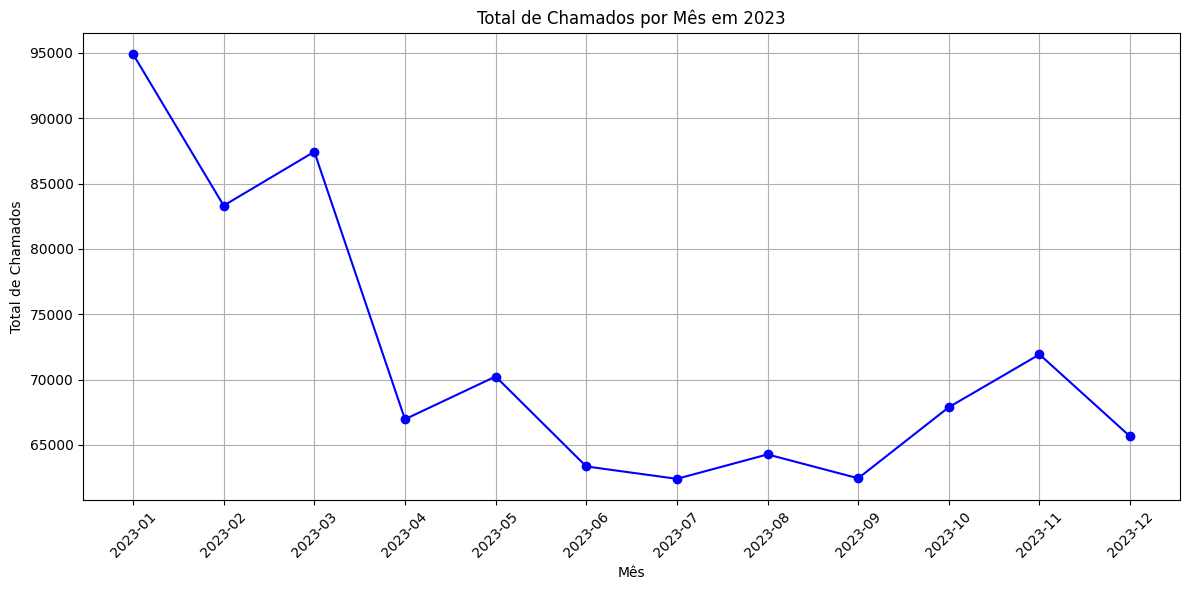

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que df10 já tenha sido carregado
# Converta a coluna 'DATA_INICIO' para o tipo datetime
df10['DATA_INICIO'] = pd.to_datetime(df10['DATA_INICIO'])

# Crie uma nova coluna 'MES' para representar o mês e o ano
df10['MES'] = df10['DATA_INICIO'].dt.to_period('M')

# Agrupe por mês e some o total de chamados
df_mes = df10.groupby('MES')['TOTAL_CHAMADOS'].sum().reset_index()

# Plote o gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_mes['MES'].astype(str), df_mes['TOTAL_CHAMADOS'], marker='o', linestyle='-', color='b')
plt.xlabel('Mês')
plt.ylabel('Total de Chamados')
plt.title('Total de Chamados por Mês em 2023')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
